We will start by importing all the necessary libraries to complete this data analytics project
The cvs file, train.csv, has been uploaded in my github repository

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('https://github.com/Kaycee-code/Data-Project/blob/main/train.csv?raw=true')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#To understand the structure of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


NOTE:
There are ONLY 204 non-null values in the Cabin Column.

In [8]:
#To further grasp a statistical insight about the given dataset
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


ANALYTIC QUESTION:
Who were the passengers on the Titanic? (Gender, Ages, Passenger Class,..etc)

INSIGHT 1:
I. Let's start by visualizing the Passenger boarding classes with respect to gender:

[Text(0.5, 0, 'Passenger Class'),
 Text(0, 0.5, 'Number of Passengers'),
 Text(0.5, 1.0, 'Number of Passengers in Each Class')]

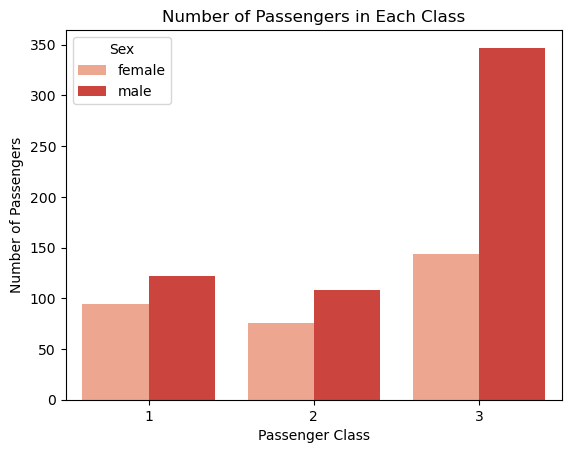

In [11]:
plot = sns.countplot(x='Pclass', data=titanic_df, hue='Sex', palette='Reds')
plot.set(xlabel='Passenger Class', ylabel='Number of Passengers', title='Number of Passengers in Each Class')

Inferences:
1. we have approximately 350 male passengers in the 3rd class
2. The 2nd class had the least number of passengers (male and female).
3. Overall, passengers favoured boarding the 3rd class of the titanic which we can assume to attract a cheaper fare.

INSIGHT II:

Let's further classify the passengers as adult and children(less than 16 years)

In [15]:
#create a function to check if a passenger is either a child or an adult: 

def adult_child(passenger):
    age = passenger
    if age <16:
        return 'Child'
    else:
        return 'Adult'

In [17]:
#Create a new column by applying the above function on titanic_df
titanic_df['Person'] = titanic_df['Age'].apply(adult_child)

In [19]:
#Test to confirm that the above function was implemented
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


[Text(0.5, 0, 'Passenger category'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 1.0, "Percentage of Passenger's Age Category")]

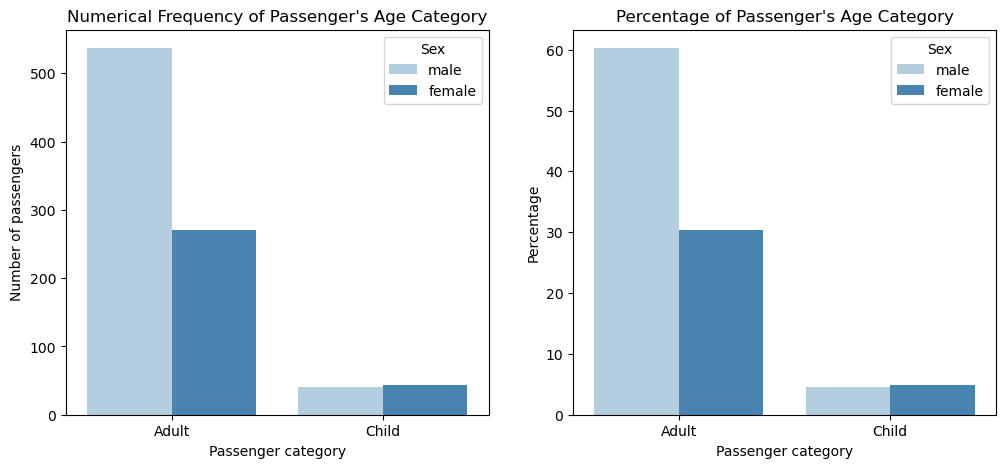

In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
chart = sns.countplot(x='Person', data= titanic_df, hue = 'Sex', palette = 'Blues')
chart.set(xlabel = 'Passenger category', ylabel='Number of passengers', title = "Numerical Frequency of Passenger's Age Category")

plt.subplot(1,2,2)
chart = sns.countplot(x='Person', data= titanic_df, hue = 'Sex', palette = 'Blues', stat='percent')
chart.set(xlabel = 'Passenger category', ylabel='Percentage', title = "Percentage of Passenger's Age Category")

In [118]:
#To verify the actual number of children (below 16 years):

titanic_df.Person.value_counts().sort_values()

Person
Child     83
Adult    808
Name: count, dtype: int64

Inferences:
1. There were more adults than children on board.
2. 60% of passengers on board were male adults (approximately 520 male adults).
3. There were less than 100 children on board.

INSIGHT 3:
Let's shade more light on the age distribution of the passengers aboard the Titanic

Using a Histogram and a KDE plot:

(0.0, 80.0)

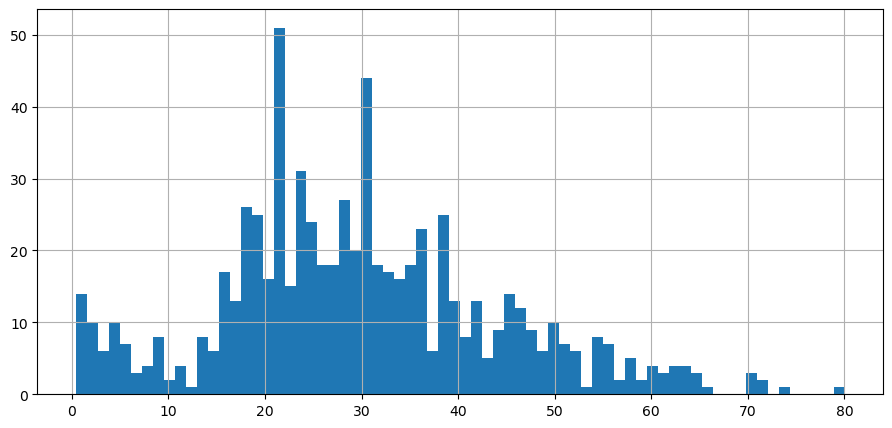

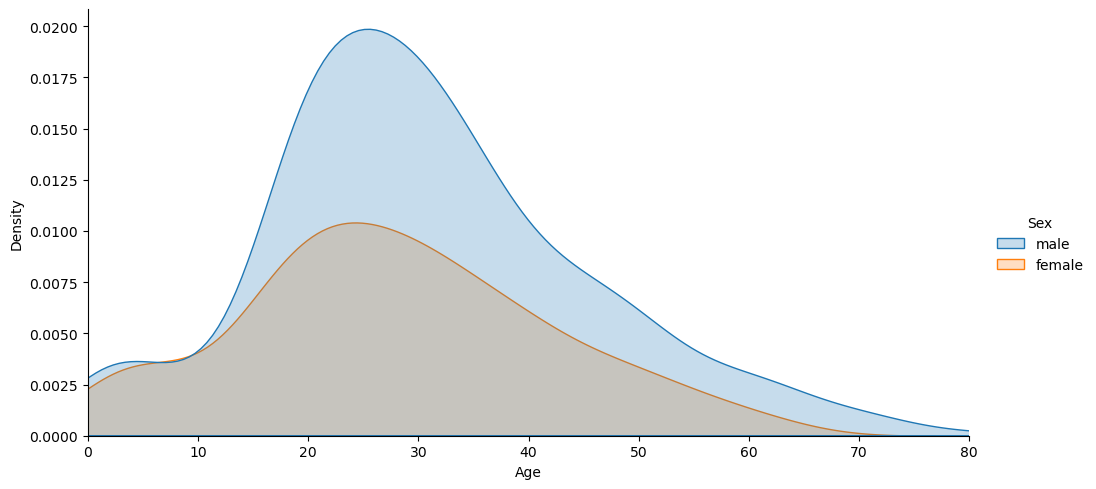

In [110]:
plt.figure(figsize=(24, 5))

plt.subplot(1,2,1)
titanic_df['Age'].hist(bins=70)

#To have a deeper look at the age distribution of male and female passengers respectively, we will deploy the KDE plot
sns.displot(data=titanic_df, x='Age', hue='Sex', kind='kde', aspect=2, fill=True)
oldest = titanic_df['Age'].max()
plt.xlim(0, oldest)



In [ ]:
titanic_df.Age.value_counts().sort_values()

INFERENCE:
1. The highest age bracket are passengers in their late 20s to early 30s
2. There were more 24-year olds on board than any other age.
3. The number of children between age 0-13 experienced a dip as the age value increased.
4. The youngest and oldest passengers were less than 1year and 74years old respectively. 

  
  
  
ANALYTIC QUESTION 2:
What deck were the passengers on and how does that relate to their boarding class?

Let's get started

In [130]:
#Let's examine the Cabin column of the titanic dataframe again:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [132]:
#Remember that there are only 204 non-null entries in the Cabin column
#get rid of the null values in the 'Cabin' Column

deck = titanic_df.Cabin.dropna()

In [134]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [138]:
levels = []
for level in deck:
    levels.append(level[0])

#let's create a dataframe called cabin_df from the resulting list, levels:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

cabin_df.Cabin.unique() #To see the number of unique decks in the Titanic


array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

[Text(0.5, 0, 'Decks'),
 Text(0, 0.5, 'Number of Passengers'),
 Text(0.5, 1.0, 'Passengers in various Decks')]

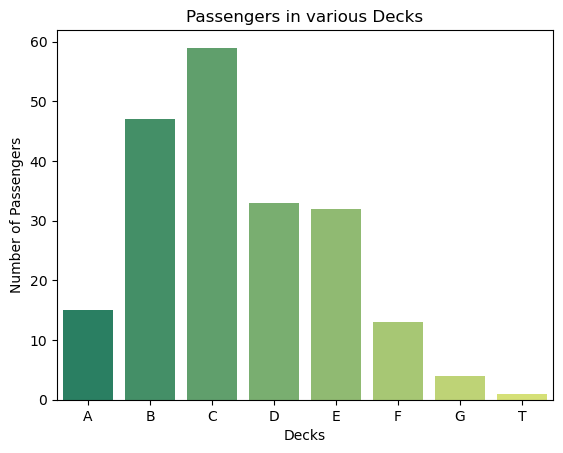

In [153]:

a = cabin_df['Cabin'].sort_values()
chart = sns.countplot(data = cabin_df, x=a, hue=a, palette = 'summer')
chart.set(xlabel='Decks', ylabel='Number of Passengers', title='Passengers in various Decks')

In [148]:
cabin_df.describe()

,Cabin
count,204
unique,8
top,C
freq,59


INFERENCE:

1. There were 59 passengers confirmed to be on Deck C on the titanic.
2. Deck G appears to be the deck with the least number of passengers.
3. Much inferences cannot be made from this column as 75% of the column entries were null values.

ANALYTIC QUESTION 3:
Which locations did the passengers board from?


Hint: The "Embarked" column gives the details of where each passenger embarked on the journey from 
and we will dig in to see what boarding class is predominant in each location.

In [151]:
#First, lets replace the Q, S, C in the Embarked column with the full city name.

titanic_df.Embarked = titanic_df.Embarked.replace({'S':'Southampton', 'Q':'Queenstown', 'C': 'Cherbourg'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult


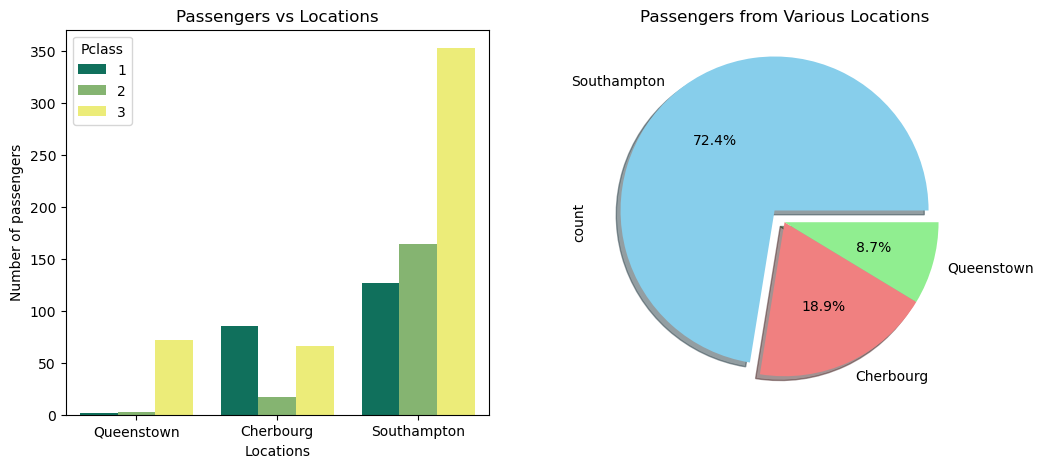

In [177]:
#Next, lets visualize the number of passengers that boarded at the three ports with respect to their passenger class
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
chart = sns.countplot(data = titanic_df, x='Embarked', hue='Pclass', order=['Queenstown', 'Cherbourg', 'Southampton'], palette = 'summer')
chart.set(xlabel='Locations', ylabel='Number of passengers', title='Passengers vs Locations')

plt.subplot(1,2,2)
titanic_df['Embarked'].value_counts().plot.pie(
    labels = titanic_df['Embarked'].unique(),
    autopct = '%1.1f%%',
    figsize = (12, 5),
    title = 'Passengers from Various Locations',
    colors = ['skyblue', 'lightcoral', 'lightgreen'],
    explode = (0.1, 0, 0), # Explode the 1st slice
    shadow = True
)
plt.show()

INFERENCE:
1. Most of the passengers boarded from Southampton
1. There were over 350 passengers who boarded 3rd class from Southampton

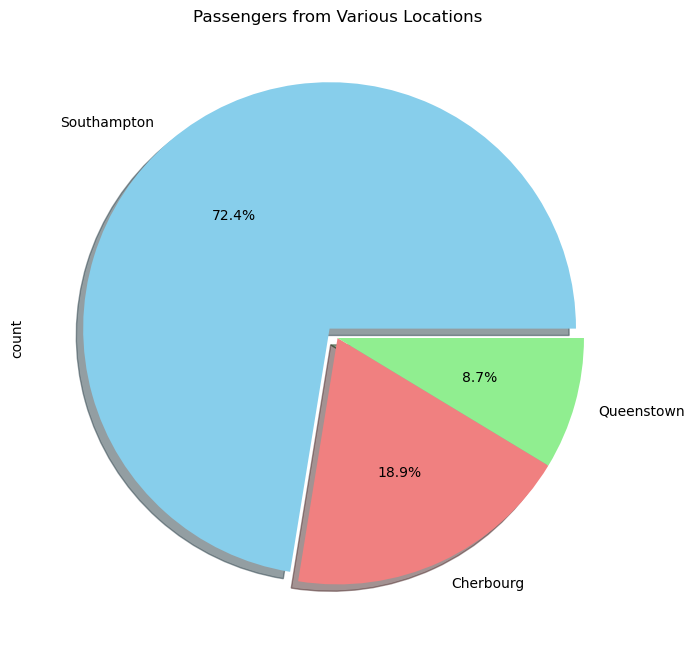

Who was alone and who was with family

In [518]:
#SibSp = Above 0 means the passenger has sibling(s) on board and 0 means they do not
#Parch = Above 0 means the passenger has parent/child on board and 0 means they do not

titanic_df['Family_onboard'] = titanic_df['SibSp'] + titanic_df['Parch']
for number in titanic_df.Family_onboard:
    if number > 0:
        titanic_df['Family_onboard'] = titanic_df.Family_onboard.replace(number, 'With Family')
    else:
        titanic_df['Family_onboard'] = titanic_df.Family_onboard.replace(number, 'Alone')
    
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,Alone


<Axes: xlabel='Family_onboard', ylabel='count'>

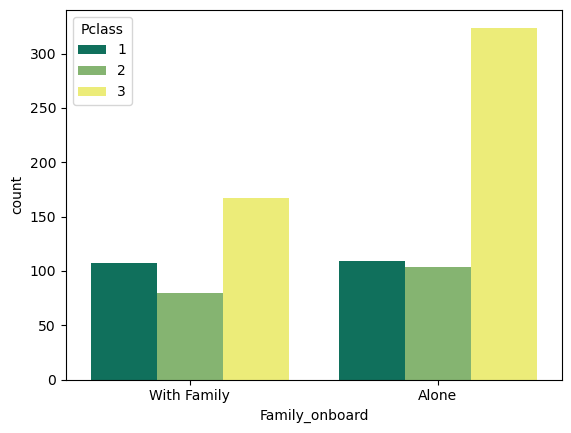

In [569]:
#Let us visualize the number of passengers with family compared to lone passengers with respect to their gender
sns.countplot(data= titanic_df, x='Family_onboard', hue = 'Pclass', palette = 'summer')

Now, we need to create a column to show whether a passenger survived the sinking or not

The Survived column shows 0 and 1 for non-survivors and survivors respectively

<Axes: xlabel='Sex', ylabel='count'>

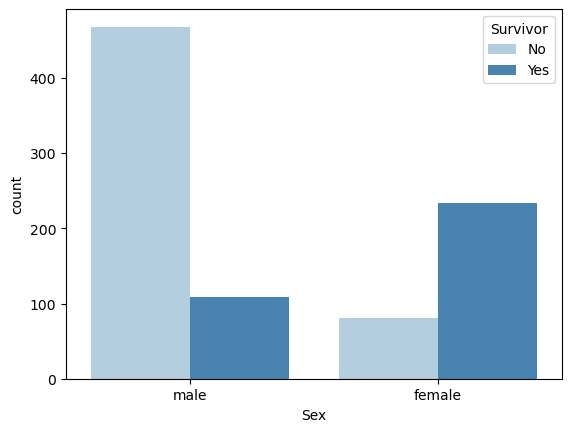

In [587]:
titanic_df['Survivor'] = titanic.Survived.map({0:'No', 1:'Yes'})

sns.countplot(data=titanic_df, x='Sex', hue='Survivor',palette= 'Blues')

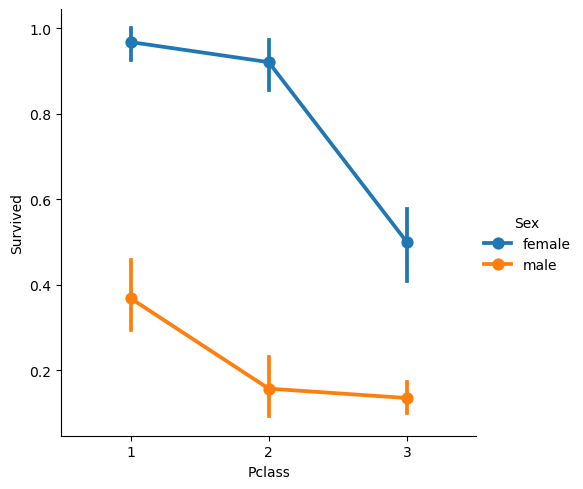

In [613]:
sns.catplot(data=titanic_df, x='Pclass', y= 'Survived', hue='Sex', kind='point')

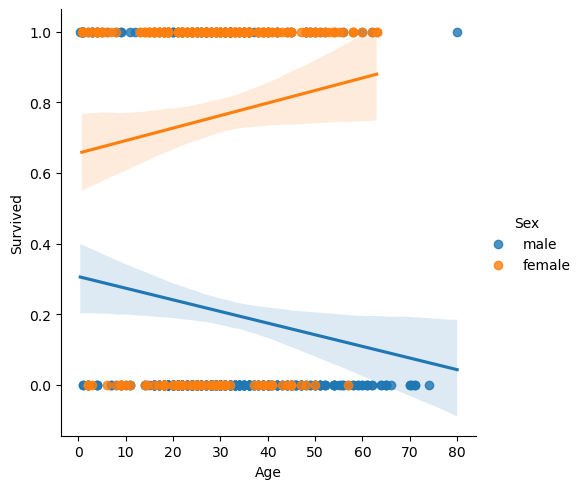

In [619]:
sns.lmplot(x='Age', y='Survived', hue= 'Sex', data=titanic_df)
#Here we can see below that the older the passenger was, the slimmer the chance of survival

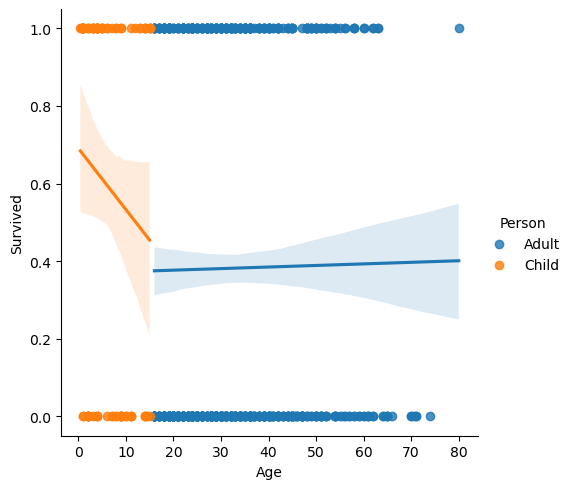

In [621]:
sns.lmplot(x='Age', y='Survived', hue= 'Person', data=titanic_df)

Did the deck have an effect on the survival rate:

In [ ]:
sns.catplot(data=titanic_df, x='', y='Survived', kind='point')

Did having a family member increase the chances of surviving the crash?:

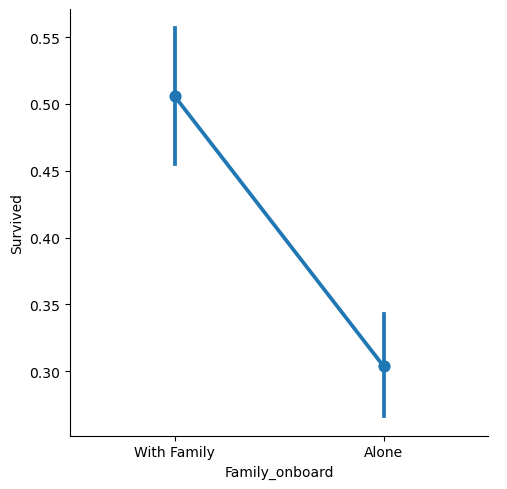

In [634]:
sns.catplot(data=titanic_df, x='Family_onboard', y='Survived', kind='point')